<a href="https://colab.research.google.com/github/reeeerra/Kmeans-Clustering/blob/main/GRMS_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [35]:
df=pd.read_csv("/content/Book1.csv")
df.head()

,KOTA,Pelanggaran,Kematian
0,BANJARNEGARA,227,1229
1,BANYUMAS,365,2674
2,BATANG,1336,249
3,BLORA,2404,435
4,BOYOLALI,414,805


Text(0, 0.5, 'Kematian')

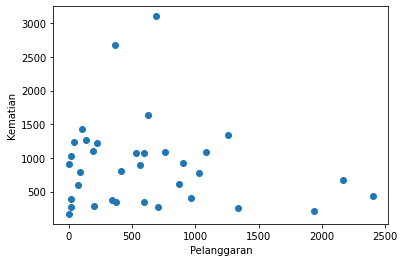

In [36]:
plt.scatter(df.Pelanggaran,df['Kematian'])
plt.xlabel('Pelanggaran')
plt.ylabel('Kematian')

In [38]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Pelanggaran','Kematian']])
y_predicted

array([1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [39]:
df['cluster']=y_predicted
df.head()

,KOTA,Pelanggaran,Kematian,cluster
0,BANJARNEGARA,227,1229,1
1,BANYUMAS,365,2674,0
2,BATANG,1336,249,2
3,BLORA,2404,435,2
4,BOYOLALI,414,805,1


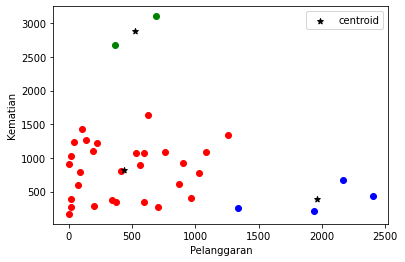

In [41]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Pelanggaran,df1['Kematian'],color='green')
plt.scatter(df2.Pelanggaran,df2['Kematian'],color='red')
plt.scatter(df3.Pelanggaran,df3['Kematian'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.xlabel('Pelanggaran')
plt.ylabel('Kematian')
plt.legend()


In [42]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(df[['Pelanggaran','Kematian']])
  sse.append(km.inertia_)

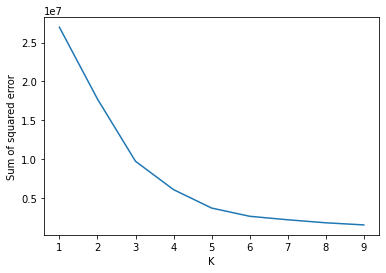

In [43]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)